## 1

In [36]:
from numpy import mean, std, array
from numpy.random import randn
from scipy.stats import ttest_1samp

t=[0.64,0.57,0.55,0.69,0.63,0.66,0.67,0.74]
h=2.000
dh=0.005
a=[]


for n in range(1000):  
    alpha=2*(h+dh*randn())/(mean(t)+std(t)*randn())**2
    a.append(alpha)
print(f"g-value: {mean(a):.4f} +- {std(a):.4f}")

result = [2*h/x**2 for x in t]
    
t,P = ttest_1samp(result,9.8004)

print(f"The t-value is: {t:.2f} with a p-value of: {P:.2f}")
print("This does produce a good value for g")

g-value: 9.9058 +- 1.9132
The t-value is: 0.14 with a p-value of: 0.89
This does produce a good value for g


This is not a very accurate measurment, sice we are outside the standard 10%

### Part 1 in Mathematica for extra 10%

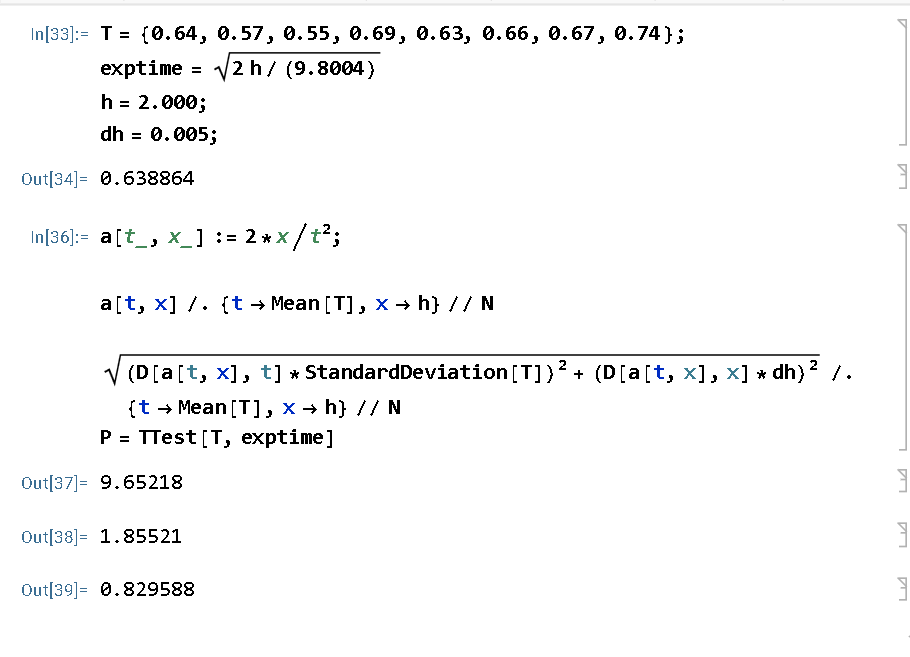

## 2

In [34]:
from numpy import mean, std, array
from numpy.random import randn
from scipy.stats import ttest_1samp
from pandas import read_csv

df=read_csv('HW05Setg.csv',header =0, usecols=["time"])

h=2.000
dh=0.002
a=[]


for n in range(1000):  
    alpha=2*(h+dh*randn())/(mean(df)+std(df)*randn())**2
    a.append(alpha)
print(f"g-value: {mean(a):.4f} +- {std(a):.4f}")

result = 2 * h / df["time"]**2
    
t,P = ttest_1samp(result,9.8004)

print(f"The t-value is: {t:.2f} with a p-value of: {P:.5f}")
print("This does NOT produce a good value for g")

g-value: 9.7632 +- 0.0164
The t-value is: -10.90 with a p-value of: 0.00000
This does NOT produce a good value for g


### Part 2 in Mathematica for 10% bonus
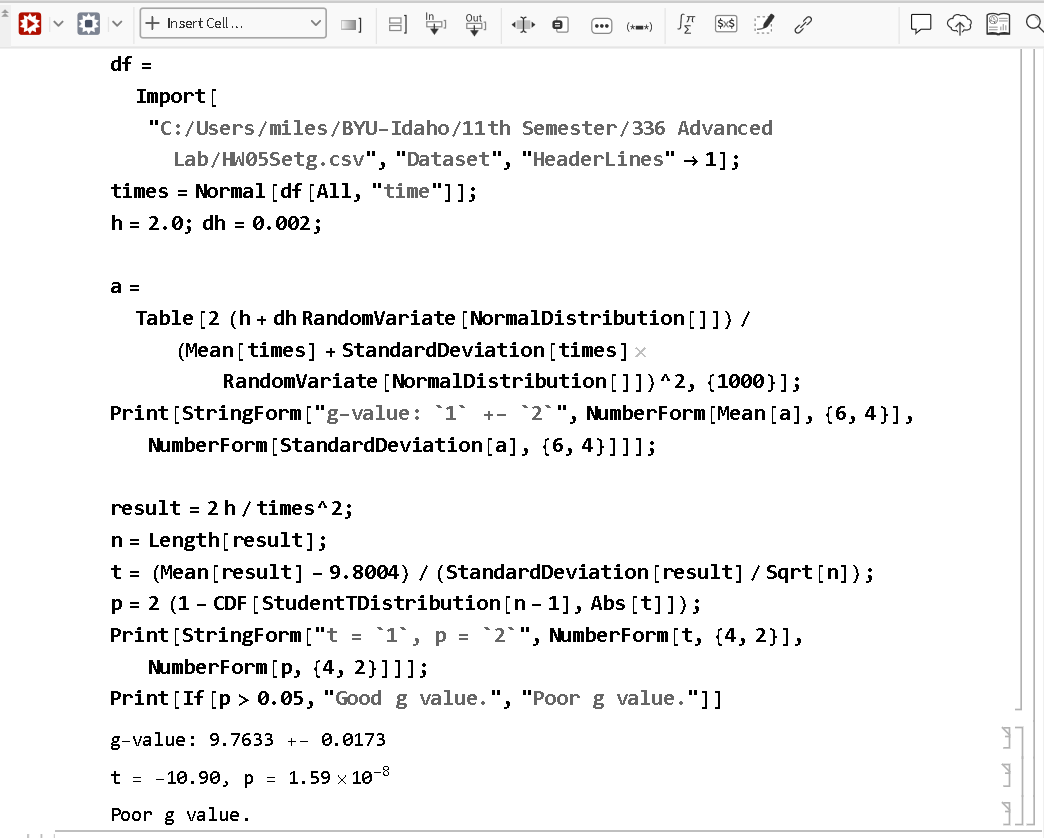

## 3

In [43]:
from numpy import mean, std, array, arange
from numpy.random import randn
from scipy.stats import ttest_1samp, binom, chi2
from pandas import read_csv

A=array([12, 55, 112, 121, 74, 24, 3])
B=array([6, 35, 90, 125, 97, 41, 7])
heads=arange(7)
p_fair = binom.pmf(heads, 6, 0.5)

n_A = A.sum()
n_B = B.sum()
expected_A = n_A * p_fair
expected_B = n_B * p_fair

chi2_A = sum((A - expected_A)**2 / expected_A)
chi2_B = sum((B - expected_B)**2 / expected_B)
dof_a = len(heads) - 1  # 6

p_A = 1 - chi2.cdf(chi2_A, dof_a)
p_B = 1 - chi2.cdf(chi2_B, dof_a)

print("--- Part (a): Fair Coin Test ---")
print(f"Set A: χ² = {chi2_A:.3f}, p = {p_A:.4f}")
print(f"Set B: χ² = {chi2_B:.3f}, p = {p_B:.4f}")
print(f"Set A fair coin assumption: {'Good' if p_A > 0.05 else 'Poor'}")
print(f"Set B fair coin assumption: {'Good' if p_B > 0.05 else 'Poor'}")




# --- Part (b): Chi-squared test comparing Set A vs Set B directly ---
# Pool the two sets to get expected proportions, then compare
combined = A + B
n_total = n_A + n_B

expected_A2 = n_A * combined / n_total
expected_B2 = n_B * combined / n_total

chi2_AB = sum((A - expected_A2)**2 / expected_A2 +
                 (B - expected_B2)**2 / expected_B2)
dof_b = len(heads) - 1  # 6

p_AB = 1 - chi2.cdf(chi2_AB, dof_b)

print("\n--- Part (b): Same Coins Test (A vs B) ---")
print(f"χ² = {chi2_AB:.3f}, p = {p_AB:.4f}")
print(f"Same coins assumption: {'Good' if p_AB > 0.05 else 'Poor - sets likely differ'}")


--- Part (a): Fair Coin Test ---
Set A: χ² = 27.776, p = 0.0001
Set B: χ² = 0.851, p = 0.9906
Set A fair coin assumption: Poor
Set B fair coin assumption: Good

--- Part (b): Same Coins Test (A vs B) ---
χ² = 18.045, p = 0.0061
Same coins assumption: Poor - sets likely differ


### Part 3 in Mathematica for bonus

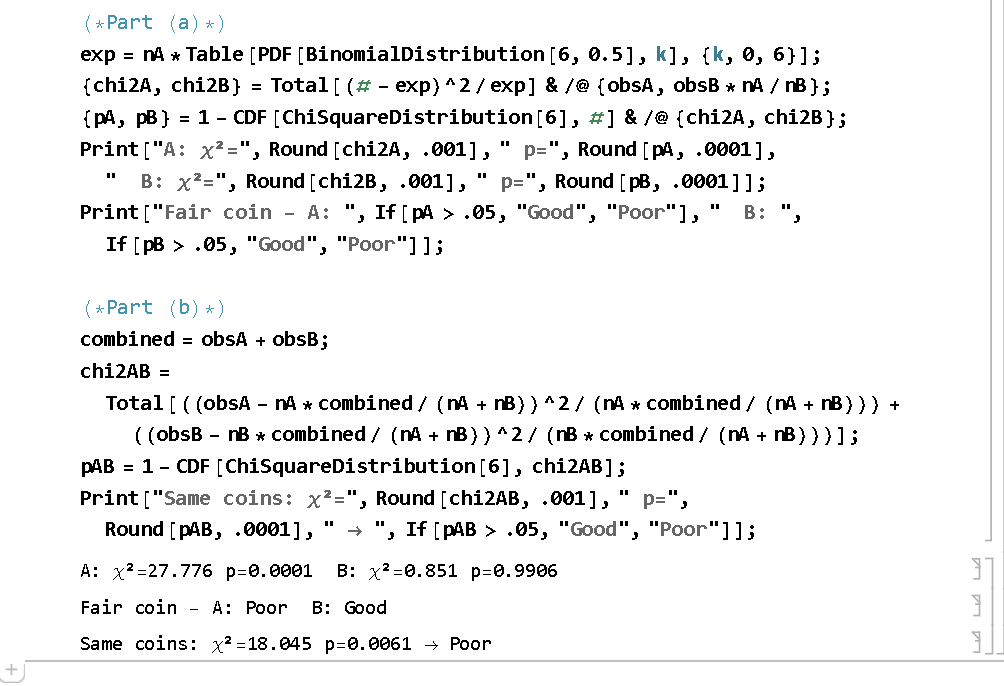

## 4

In [46]:
from pandas import read_csv
from numpy import sqrt, arange, array
from scipy.special import erfinv
from scipy.stats import chi2, poisson

Set1 = read_csv("Set1.csv")
data = Set1["A"]
xbar = data.mean()
sigma = data.std()
sigma_xbar = sigma / sqrt(len(data))

print(f"Mean value: {xbar:.2f}")
print(f"Uncertainty value: {sigma:.2f}")
print(f"Uncertainty in the mean value: +- {sigma_xbar:.2f}")
print(f"Uncertainty in the mean to 90% confidence: +- {sqrt(2)*erfinv(0.9)*sigma_xbar:.2f}")

# --- Chi-squared test against Poisson(mu=4.5) ---
mu = 4.5

# Bin the data: count how many times each value appears
counts = data.value_counts().sort_index()
observed = counts.values
k_vals = counts.index.astype(int)

# Expected counts from Poisson distribution
expected = len(data) * poisson.pmf(k_vals, mu)

# Merge bins with expected count < 5 (standard chi-squared requirement)
while expected[0] < 5:
    observed = [observed[0] + observed[1], *observed[2:]]
    expected = [expected[0] + expected[1], *expected[2:]]
    k_vals = k_vals[1:]
while expected[-1] < 5:
    observed = [*observed[:-2], observed[-2] + observed[-1]]
    expected = [*expected[:-2], expected[-2] + expected[-1]]
    k_vals = k_vals[:-1]

observed, expected = array(observed), array(expected)

chi2_stat = ((observed - expected)**2 / expected).sum()
dof = len(observed) - 1  # mu is given, not estimated from data
p_val = 1 - chi2.cdf(chi2_stat, dof)

print(f"\n--- Poisson Chi-Squared Test (μ = {mu}) ---")
print(f"χ² = {chi2_stat:.3f}, dof = {dof}, p = {p_val:.4f}")
print(f"Conclusion: Poisson(μ=4.5) is a {'good' if p_val > 0.05 else 'poor'} fit")

Mean value: 4.82
Uncertainty value: 2.44
Uncertainty in the mean value: +- 0.22
Uncertainty in the mean to 90% confidence: +- 0.37

--- Poisson Chi-Squared Test (μ = 4.5) ---
χ² = 5.019, dof = 7, p = 0.6577
Conclusion: Poisson(μ=4.5) is a good fit


## 5

### Part 5 with Excel and additionally python for bonus

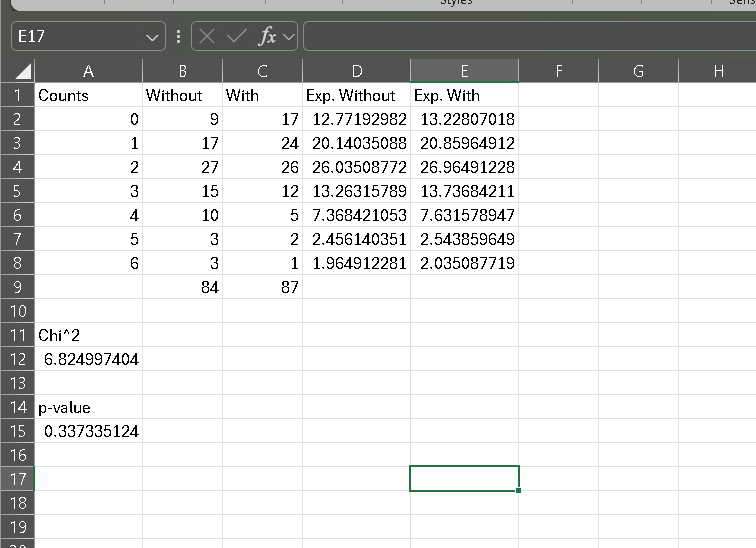

In [50]:
from numpy import sqrt, arange, array
from scipy.special import erfinv
from scipy.stats import chi2, poisson


container=array([9,17,27,15,10,3,3])
no_container=array([17,24,26,12,5,2,1])

chi2_stat=((no_container-container)**2/container).sum()
dof = len(no_container) - 1  # mu is given, not estimated from data
p_val = 1 - chi2.cdf(chi2_stat, dof)

print(f"χ² = {chi2_stat:.3f}, dof = {dof}, p = {p_val:.4f}")
print(f"Container alters background: {'Yes' if p_val < 0.05 else 'No'}")


χ² = 14.797, dof = 6, p = 0.0219
Container alters background: Yes
